In [2]:
library("phyloseq"); packageVersion("phyloseq")
library("ape"); packageVersion("ape")
library("vegan"); packageVersion("vegan")
library("dplyr"); packageVersion("dplyr")
library("microbiome"); packageVersion("microbiome")
library("pairwiseAdonis"); packageVersion("pairwiseAdonis")
library("tidyverse")

[1] ‘1.34.0’

[1] ‘5.4.1’

[1] ‘2.5.7’

[1] ‘1.0.6’

[1] ‘1.12.0’

[1] ‘0.0.1’

In [3]:
SV <- t(read.table("/Users/stephanie.rosales/Documents/omics_projects/NutrientsAC16S/trim/exported_AcNu_trim/id-fil4-table-BacArc_AcNu_trimV2.txt",
                   row.names = 1, header = TRUE))
head(SV)
dim(SV)
#removed "#" from first row
map<- read.table("/Users/stephanie.rosales/Documents/omics_projects/NutrientsAC16S/2019_Acer_nutrients/AcNutrients/Nutrient_16s_Metadata.txt",
                 row.names = 1, header = TRUE)
head(map)
dim(map)
## to import taxonomy I had to convert ; into tabs and remove last columns
tax <-as.matrix(read.table("/Users/stephanie.rosales/Documents/omics_projects/NutrientsAC16S//trim/exported_AcNu_trim/taxonomyAcNu_trim.tsv",  
                           row.names = 1, header = FALSE, sep = "\t"))
#head(tax)
colnames(tax) <- c ("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species", "ASV")
tax[tax==""] <- NA
head(tax)
dim(tax)

tree_file <-read_tree("/Users/stephanie.rosales/Documents/omics_projects/NutrientsAC16S//trim/exported_AcNu_trim/tree.nwk")

,d9a37d86155d9224b0a9331fec4c3504,cab8eef5312f82c2e00ad312974ad6ed,d8ea642fc64ba46b20cf9027953a29f9,1e9cd04a2da65bafb92a7a3224becd2e,636656e4ac93f5a5edfe3104eab2db63,5193b52304263921a5e1dbcc84a1b849,41531f154bb221e03508727eaf129243,6f10d48abc894d56a02da05a1cd3bb66,12184c9ceef8cc2015cb2f659c1a1d89,bf45ce7baebb29297ea31e5f7496f350,⋯,aec0fec10137d67a1310b8ebb1602a98,e2dce05cbcc6376ab4aa4965529f50a6,9e2984401299cba366ccf312dce46d0b,cff5f96d465d20716d6d3aeee83e6083,e974575b4e6102a8fdb7e3afd986780e,19afd9f51f8e1da2ee5c4f1131c3d2eb,2ea8111fdefe5ef302e76f5c4d14cd9b,cd11ff87e428c86084eb9decd268b24b,1453102b92c9d7d397fe47a7b4f2550b,f699f2eda1aa2e2616af92224ff03425
AC101JanuaryRY,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AC102FebruaryRY,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AC102JanuaryRY,0,4,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,9,0,0
AC102MarchRY,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AC103DecemberRY,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AC104JanuaryRY,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 181 667

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”


,frag_ID,former.id,EuC1,EuC2,Richness,error,lower,upper,Bcode,Barcode,⋯,Date_DNA,dBW_g,Date_BW,Chl_a,Chl_a_mean,Sym_cm2,Sym_cm2_mean,Date.Blastate,Days_Experiment,Days_Survivor
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>
AC281FebruaryG,281_AC,281-February-G,-0.007053997,-0.04281782,62.06071,0.2480985,62.01178,62.31294,515rcbc144,GTTTGAAACACG,⋯,1/29/18,4.1258741,1/29/18,NA,3.105,NA,4.324443,NA,76,188
AC284FebruaryG,284_AC,284-February-G,-0.021757804,-0.02848575,53.16160,0.4106332,53.03082,53.84728,515rcbc28,CTGTCTATACTA,⋯,1/29/18,4.7853084,1/29/18,NA,3.105,NA,4.324443,NA,76,188
AC285FebruaryG,285_AC,285-February-G,-0.011859619,-0.07701386,111.30642,0.5636194,111.05867,112.60044,515rcbc185,CGCGCCTTAAAC,⋯,1/29/18,0.6627697,1/29/18,NA,5.310,NA,5.133481,NA,76,188
AC286FebruaryG,286_AC,286-February-G,0.009089110,-0.02756048,33.03090,0.1770837,33.00599,33.15936,515rcbc41,GCGATCACACCT,⋯,1/29/18,1.7548049,1/29/18,NA,5.705,NA,6.063486,NA,76,188
AC289FebruaryG,289_AC,289-February-G,-0.011670994,-0.03444584,45.12034,0.3534222,45.02302,45.62898,515rcbc7,ACCTTACACCTT,⋯,1/29/18,2.1139784,1/29/18,NA,5.705,NA,6.063486,NA,76,188
AC152FebruaryO,152_AC,152-February-O,-0.019906845,-0.02994868,56.17302,0.4221207,56.03326,56.90015,515rcbc103,TTGCGGACCCTA,⋯,2/23/18,1.9417000,2/23/18,NA,NA,NA,NA,NAN,99,211


[1] 189  60

,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV
fa2bb284987f22d98177ba72ffb9fc0d,D_0__Bacteria,D_1__Proteobacteria,Alphaproteobacteria,Caulobacterales,Hyphomonadaceae,Oceanicaulis,NA,ASV1
f7f3145eef65b9615405b9ffa700bbc5,D_0__Bacteria,D_1__Proteobacteria,Deltaproteobacteria,Bdellovibrionales,Bdellovibrionaceae,Bdellovibrio,D_6__uncultured,ASV2
1fbc731d023324de9f4ee8f3263ec695,D_0__Bacteria,D_1__Planctomycetes,Planctomycetacia,Pirellulales,Pirellulaceae,Pir4,NA,ASV3
6ee8ad4ecdf9b05a8c6ff6446a994246,D_0__Bacteria,D_1__Proteobacteria,Deltaproteobacteria,Bdellovibrionales,Bdellovibrionaceae,OM27,NA,ASV4
ce3282f60bf4b99061bd6ef2a7092061,D_0__Bacteria,D_1__Proteobacteria,Gammaproteobacteria,Oceanospirillales,Nitrincolaceae,Marinobacterium,D_6__bacterium,ASV5
62312057115704234b8ddbbc4685efb9,D_0__Bacteria,D_1__Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,NA,ASV6


[1] 2926    8

In [4]:
ps = phyloseq(otu_table(SV, taxa_are_rows=FALSE), 
               sample_data(map), 
               tax_table(tax),phy_tree(tree_file))
ps

ps = subset_samples(ps, former.id != "105-December-RY" & former.id!="102-December-RY" &
                   former.id !="104-December-RY" &  former.id !="178-January-G" & former.id !="NTC" &
                   former.id !="116-February-GO" & former.id !="126-March-Sick-GO")
ps 


ps = subset_taxa(ps, ASV!="ASV2107")
ps 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 667 taxa and 181 samples ]
sample_data() Sample Data:       [ 181 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 667 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 667 tips and 666 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 667 taxa and 179 samples ]
sample_data() Sample Data:       [ 179 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 667 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 667 tips and 666 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 179 samples ]
sample_data() Sample Data:       [ 179 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

In [5]:
psr  = transform_sample_counts(ps, function(x) x / sum(x))
ps_clr <- microbiome::transform(ps, 'clr') 

In [9]:
#subset control
ps_clr_C1 = subset_samples(ps_clr, Treatments=="AC_D75")
ps_clr_C1

#subset Treatment

ps_clr_CON = subset_samples(ps_clr, Treatment=="C")
ps_clr_CON

genets=c("G_48", "G_62")
ps_clr_N = subset_samples(ps_clr, Treatment=="N" & Genotype %in% genets)
ps_clr_N

genets=c("G_48", "G_62", "G_31")
ps_clr_NP = subset_samples(ps_clr, Treatment=="NP" & Genotype %in% genets)
ps_clr_NP

#subset by timepoints
ps_clr_time1 = subset_samples(ps_clr, TimePoint=="T-1" )
ps_clr_time1
ps_time1 = subset_samples(ps, TimePoint=="T-1" )
ps_time1

genets=c("G_48", "G_62", "G_31")
ps_clr_time2 = subset_samples(ps_clr, TimePoint=="T-2" & Genotype %in% genets )
ps_clr_time2
genets=c("G_48", "G_62", "G_31")
ps_clr_time3 = subset_samples(ps_clr, TimePoint=="T-3" & Genotype %in% genets)
ps_clr_time3

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 84 samples ]
sample_data() Sample Data:       [ 84 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 85 samples ]
sample_data() Sample Data:       [ 85 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 85 samples ]
sample_data() Sample Data:       [ 85 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

In [46]:
#What explains the most variation

ps_clr_df=as.data.frame(otu_table(ps_clr))
ps_clr_meta= as(sample_data(ps_clr), "data.frame")

adonis(ps_clr_df~Treatment*TimePoint*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean") 
#Timepoits has the biggest effect so I will parse the data by timepoints


Call:
adonis(formula = ps_clr_df ~ Treatment * TimePoint * Genotype,      data = ps_clr_meta, permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                              Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Treatment                      2      4727  2363.5  3.9928 0.03452  0.001 ***
TimePoint                      2     17939  8969.6 15.1525 0.13102  0.001 ***
Genotype                       5      7126  1425.3  2.4077 0.05205  0.001 ***
Treatment:TimePoint            4      6602  1650.5  2.7882 0.04822  0.001 ***
Treatment:Genotype            10      8184   818.4  1.3825 0.05977  0.001 ***
TimePoint:Genotype            10      6902   690.2  1.1659 0.05041  0.077 .  
Treatment:TimePoint:Genotype   6      3156   526.0  0.8886 0.02305  0.798    
Residuals                    139     82282   592.0         0.60096           
Total                        178    136918                 1.00000    

In [10]:
#By time point
ps_clr_df=as.data.frame(otu_table(ps_clr_time1))
ps_clr_meta= as(sample_data(ps_clr_time1), "data.frame")

adonis(ps_clr_df~Treatment*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean") 
#At timepoint 1 genotype has the largest effect


ps_clr_df=as.data.frame(otu_table(ps_clr_time2))
ps_clr_meta= as(sample_data(ps_clr_time2), "data.frame")

adonis(ps_clr_df~Treatment*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean") 
#At timepoint 1 genotype has the largest effect


ps_clr_df=as.data.frame(otu_table(ps_clr_time3))
ps_clr_meta= as(sample_data(ps_clr_time3), "data.frame")

adonis(ps_clr_df~Treatment*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean") 
#At timepoint 1 genotype has the largest effect


Call:
adonis(formula = ps_clr_df ~ Treatment * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Treatment           2      2014 1007.04  1.5169 0.03329  0.015 *  
Genotype            5      6568 1313.62  1.9787 0.10857  0.001 ***
Treatment:Genotype 10      7433  743.34  1.1197 0.12287  0.096 .  
Residuals          67     44481  663.89         0.73526           
Total              84     60496                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = ps_clr_df ~ Treatment * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Treatment           2    1569.0  784.52  2.1141 0.10716  0.001 ***
Genotype            2     697.9  348.94  0.9403 0.04766  0.625    
Treatment:Genotype  3    1242.4  414.14  1.1160 0.08485  0.163    
Residuals          30   11132.9  371.10         0.76033           
Total              37   14642.2                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = ps_clr_df ~ Treatment * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Treatment           2    5009.0 2504.51  3.5499 0.20824  0.001 ***
Genotype            2    1280.5  640.25  0.9075 0.05323  0.570    
Treatment:Genotype  3    2243.1  747.71  1.0598 0.09325  0.332    
Residuals          22   15521.5  705.52         0.64527           
Total              29   24054.1                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups     5 2205.73  441.15 20.389    999  0.001 ***
Residuals 24  519.28   21.64                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           G_31       G_48       G_50       G_62        G_7   G_8
G_31            6.4000e-01 7.5100e-01 1.8700e-01 1.0000e-03 0.016
G_48 6.3412e-01            9.3300e-01 3.1400e-01 1.0000e-03 0.073
G_50 7.4560e-01 9.2403e-01            3.3900e-01 1.0000e-03 0.102
G_62 2.1094e-01 3.1573e-01 3.7392e-01            1.0000e-03 0.727
G_7  3.5954e-08 4.6290e-07 5.0892e-06 2.1948e-04            0.008
G_8  1.7792e-03 8.1718e-02 1.1052e-01 6.4989e-01 3.0797e-04      

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                 diff        lwr       upr     p adj
G_48-G_31   1.0025836  -7.706250  9.711417 0.9991471
G_50-G_31   0.7265155  -8.921334 10.374365 0.9998928
G_62-G_31   4.8393277  -3.869506 13.548161 0.5337201
G_7-G_31   21.9239724  13.502639 30.345306 0.0000004
G_8-G_31    7.6215586  -4.411424 19.654541 0.3936372
G_50-G_48  -0.2760682  -9.559716  9.007579 0.9999989
G_62-G_48   3.8367441  -4.466803 12.140291 0.7099927
G_7-G_48   20.9213888  12.919891 28.922887 0.0000004
G_8-G_48    6.6189750  -5.124014 18.361964 0.5187158
G_62-G_50   4.1128123  -5.170835 13.396460 0.7438677
G_7-G_50   21.1974569  12.182958 30.211956 0.0000023
G_8-G_50    6.8950431  -5.560277 19.350363 0.5376828
G_7-G_62   17.0846447   9.083147 25.086143 0.0000108
G_8-G_62    2.7822309  -8.960758 14.525219 0.9757995
G_8-G_7   -14.3024138 -25.833800 -2.771028 0.0091959



Call:
adonis(formula = ps_clr_df_C1 ~ Genotype, data = ps_clr_meta_C1,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
Genotype   5    4993.9  998.78  1.5628 0.24561  0.005 **
Residuals 24   15338.7  639.11         0.75439          
Total     29   20332.6                 1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

Set of permutations < 'minperm'. Generating entire set.



pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
G_50 vs G_62,1,515.9389,1.2975703,0.13956015,0.1150000,1.000,
G_50 vs G_8,1,721.9226,1.6194681,0.28818885,0.1333333,1.000,
G_50 vs G_31,1,350.4987,1.3472666,0.16140213,0.0880000,1.000,
G_50 vs G_7,1,1878.3625,1.7245689,0.16080543,0.0180000,0.270,
G_50 vs G_48,1,407.8850,1.4547260,0.15386232,0.0520000,0.780,
G_62 vs G_8,1,742.9434,1.3852245,0.18756701,0.2750000,1.000,
G_62 vs G_31,1,435.4739,1.2037117,0.11796802,0.0650000,0.975,
G_62 vs G_7,1,1811.4289,1.7731455,0.13881823,0.0030000,0.045,.
G_62 vs G_48,1,353.2476,0.9604379,0.08762769,0.5760000,1.000,


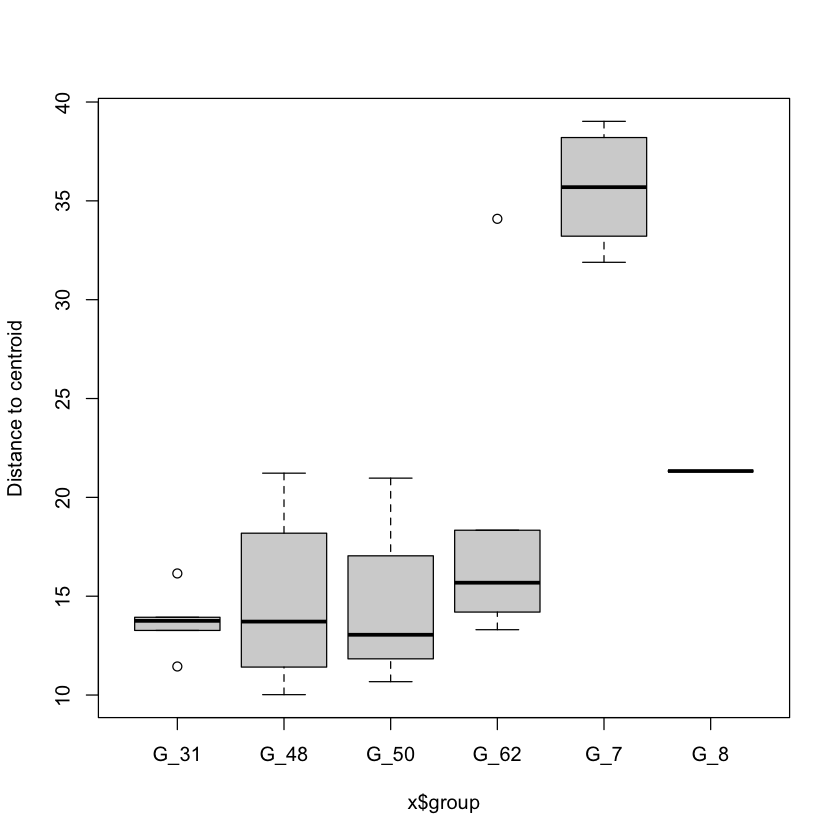

In [15]:
##Genotype differences

#distances between controls only
ps_clr.dist_C1<- vegdist(otu_table(ps_clr_C1), method ="euclidean")
## Calculate multivariate dispersions
mod_geno <- betadisper(ps_clr.dist_C1, sample_data(ps_clr_C1)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
TukeyHSD(mod_geno)
boxplot(mod_geno)


#test control-1 samples for genotype differences

ps_clr_df_C1=as.data.frame(otu_table(ps_clr_C1))
ps_clr_meta_C1= as(sample_data(ps_clr_C1), "data.frame")

adonis(ps_clr_df_C1~Genotype, 
       data= ps_clr_meta_C1, permutations = 999,
         method = "euclidean") 


pairwise.adonis(ps_clr_df_C1, ps_clr_meta_C1$Genotype, sim.method = "euclidean",
                p.adjust.m = "bonferroni")


#Pairwise from tukey AC7 is diferent from AC31, AC48, AC50, AC62, AC8
#Permutest groups are sid diff and AC7 is different from all genotypes
# Adonis sig different 
#Pairwise adonis only AC7 was different from AC62, Ac31, AC48

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
          diff        lwr      upr     p adj
N-C   1.164715  -6.880105 9.209535 0.9363412
NP-C -1.024303  -8.843030 6.794423 0.9475578
NP-N -2.189018 -10.297981 5.919945 0.7960592



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     2    65.7  32.847 0.2076    999  0.811
Residuals 82 12973.2 158.210                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
         C       N    NP
C          0.75700 0.742
N  0.74639         0.529
NP 0.73069 0.53481      


Call:
adonis(formula = ps_clr_time1_df ~ Treatment:Genotype, data = ps_clr_time1_meta,      permutations = 999, method = "euclidean", strata = ps_clr_time1_meta$Genotype) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
Treatment:Genotype 17     16016  942.10   1.419 0.26474  0.016 *
Residuals          67     44481  663.89         0.73526         
Total              84     60496                 1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NP vs C,1,968.2937,1.451148,0.02482668,0.035,0.105,
NP vs N,1,945.9534,1.314180,0.02419589,0.102,0.306,
C vs N,1,1107.8527,1.466956,0.02644738,0.068,0.204,


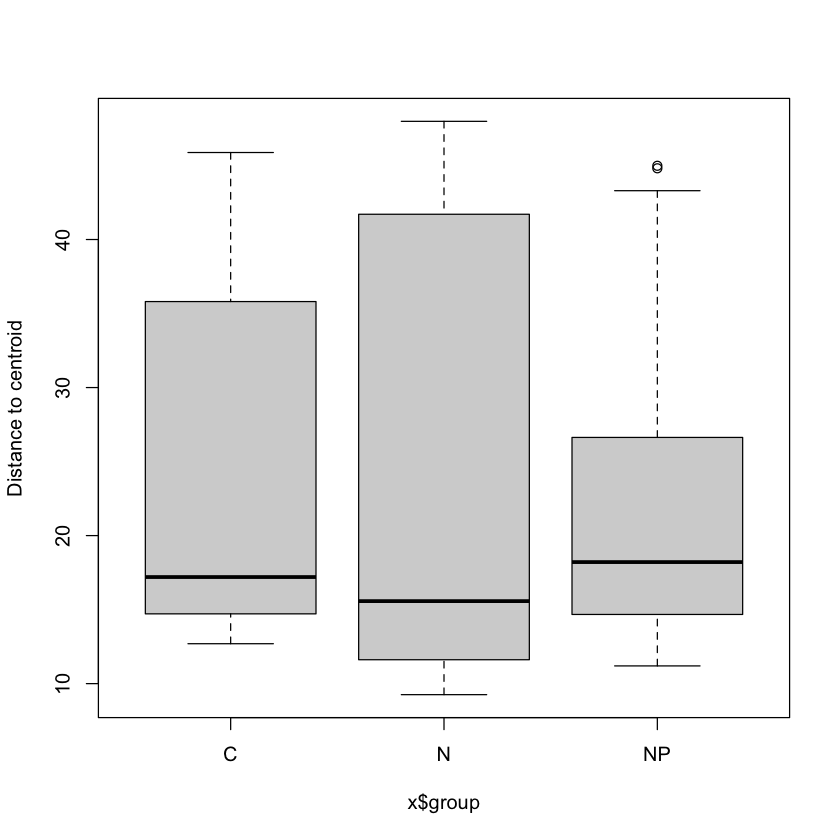

In [67]:
#distances between T-1 only test nutrient treatment
ps_clr_time1.dist <- vegdist(otu_table(ps_clr_time1), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr_time1.dist, sample_data(ps_clr_time1)$Treatment)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)


#test t-1 samples for treatment differences

ps_clr_time1_df=as.data.frame(otu_table(ps_clr_time1))
ps_clr_time1_meta= as(sample_data(ps_clr_time1), "data.frame")

adonis(ps_clr_time1_df~Treatment:Genotype, 
       data= ps_clr_time1_meta, permutations = 999,
         method = "euclidean", strata=ps_clr_time1_meta$Genotype) 


pairwise.adonis(ps_clr_time1_df, ps_clr_time1_meta$Treatment, sim.method = "euclidean",
                p.adjust.m = "bonferroni")


#variance not significant
#group differences are sig, but not pairwise



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
           diff       lwr      upr     p adj
N-C   3.9794592 -1.208048 9.166967 0.1602863
NP-C  0.2052711 -4.530254 4.940796 0.9938161
NP-N -3.7741881 -8.961696 1.413319 0.1908718



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     2 111.04   55.52 2.1183    999  0.132
Residuals 35 917.35   26.21                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          C        N    NP
C           0.083000 0.904
N  0.090053          0.124
NP 0.898093 0.127768      


Call:
adonis(formula = ps_clr_time2_df ~ Treatment, data = ps_clr_time2_meta,      permutations = 999, method = "euclidean", strata = ps_clr_time2_meta$Genotype) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Treatment  2      1569  784.52  2.1003 0.10716  0.001 ***
Residuals 35     13073  373.52         0.89284           
Total     37     14642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
N vs NP,1,981.9880,2.411705,0.09879298,0.001,0.003,*
N vs C,1,706.2955,1.768679,0.07441219,0.005,0.015,.
NP vs C,1,682.3060,2.111127,0.07509934,0.001,0.003,*


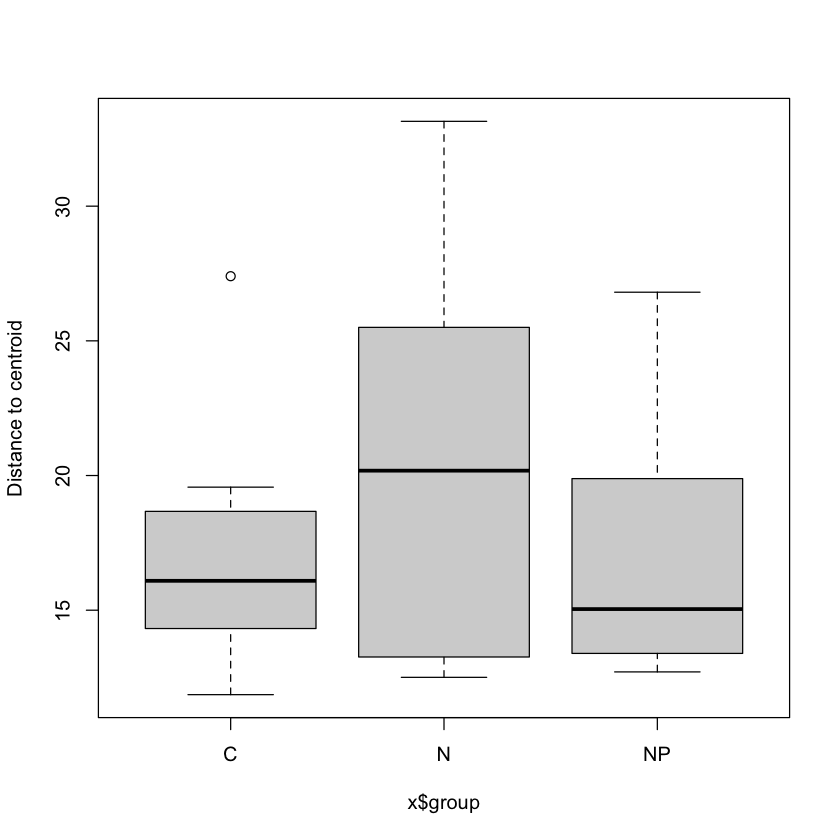

In [49]:
#distances between T-2 only test treatment
ps_clr_time2.dist <- vegdist(otu_table(ps_clr_time2), method ="euclidean")
## Calculate multivariate dispersions
mod_T2 <- betadisper(ps_clr_time2.dist, sample_data(ps_clr_time2)$Treatment)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T2)
permutest(mod_T2, pairwise = TRUE, permutations = 999)
boxplot(mod_T2)


#test t-1 samples for treatment differences

ps_clr_time2_df=as.data.frame(otu_table(ps_clr_time2))
ps_clr_time2_meta= as(sample_data(ps_clr_time2), "data.frame")

adonis(ps_clr_time2_df~Treatment, 
       data= ps_clr_time2_meta, permutations = 999,
         method = "euclidean", strata=ps_clr_time2_meta$Genotype) 


pairwise.adonis(ps_clr_time2_df, ps_clr_time2_meta$Treatment, sim.method = "euclidean",
                p.adjust.m = "bonferroni")


#variance not significant
#group differences are sig, and so are all pairwise



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
         diff       lwr       upr     p adj
N-C  2.605983 -3.716796  8.928763 0.5697386
NP-C 6.920887  2.031101 11.810674 0.0044020
NP-N 4.314904 -2.230838 10.860646 0.2488702



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)   
Groups     2 295.86 147.930 6.1744    999  0.008 **
Residuals 27 646.88  23.959                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           C         N    NP
C            0.3030000 0.002
N  0.3179552           0.196
NP 0.0005005 0.1923609      


Call:
adonis(formula = ps_clr_time3_df ~ Treatment, data = ps_clr_time3_meta,      permutations = 999, method = "euclidean", strata = ps_clr_time3_meta$Genotype) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Treatment  2      5009 2504.51  3.5506 0.20824  0.001 ***
Residuals 27     19045  705.37         0.79176           
Total     29     24054                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C vs N,1,3673.012,6.339351,0.2716164,0.001,0.003,*
C vs NP,1,2129.041,3.075380,0.1179419,0.001,0.003,*
N vs NP,1,1703.578,1.936228,0.1214985,0.014,0.042,.


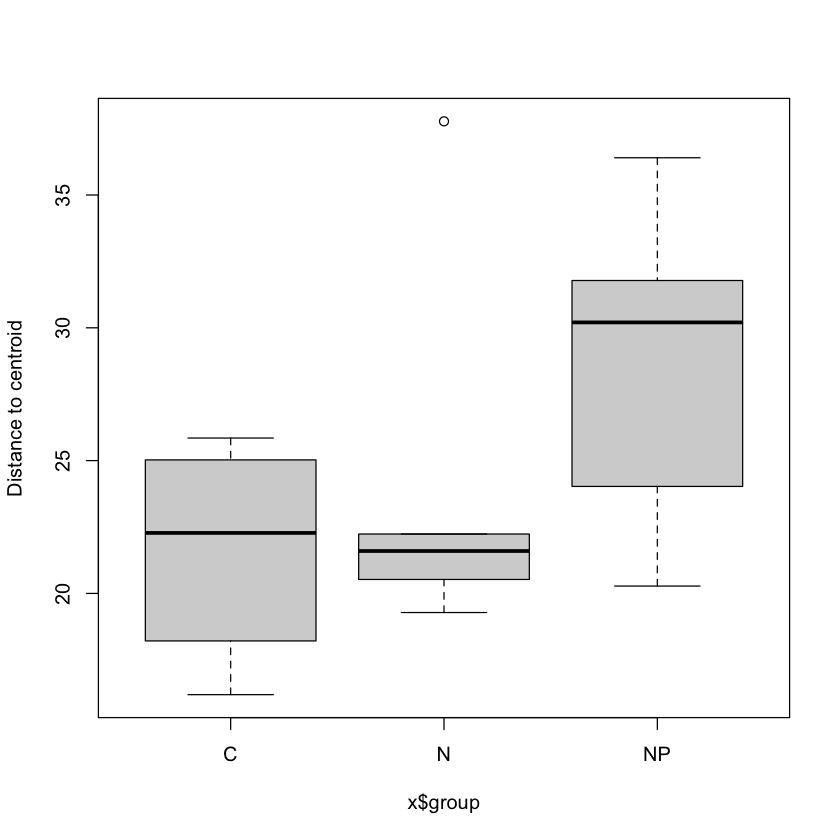

In [50]:
#distances between T-3 only test treatment
ps_clr_time3.dist <- vegdist(otu_table(ps_clr_time3), method ="euclidean")
## Calculate multivariate dispersions
mod_T3 <- betadisper(ps_clr_time3.dist, sample_data(ps_clr_time3)$Treatment)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T3)
permutest(mod_T3, pairwise = TRUE, permutations = 999)
boxplot(mod_T3)


#test t-1 samples for treatment differences

ps_clr_time3_df=as.data.frame(otu_table(ps_clr_time3))
ps_clr_time3_meta= as(sample_data(ps_clr_time3), "data.frame")

adonis(ps_clr_time3_df~Treatment, 
       data= ps_clr_time3_meta, permutations = 999,
         method = "euclidean", strata=ps_clr_time3_meta$Genotype) 



pairwise.adonis(ps_clr_time3_df, ps_clr_time3_meta$Treatment, sim.method = "euclidean",
                p.adjust.m = "bonferroni")


#variance was significant and pairwise between Np and C
#group differences are sig, and C and Np and N

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
              diff       lwr      upr     p adj
T-2-T-1 -2.6267846 -8.009327 2.755758 0.4773155
T-3-T-1 -0.6257123 -6.114290 4.862865 0.9600034
T-3-T-2  2.0010723 -3.577773 7.579917 0.6691708



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     2  107.3  53.670 0.7291    999  0.485
Residuals 81 5962.2  73.608                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
        T-1     T-2   T-3
T-1         0.32800 0.814
T-2 0.32555         0.223
T-3 0.79517 0.23076      


Call:
adonis(formula = ps_clr_df_CON ~ TimePoint, data = ps_clr_meta_CON,      permutations = 999, method = "euclidean", strata = ps_clr_meta_CON$Genotype) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
TimePoint  2     13221  6610.6  11.135 0.21564  0.001 ***
Residuals 81     48089   593.7         0.78436           
Total     83     61311                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
T-2 vs T-1,1,3454.632,5.670923,0.09195457,0.001,0.003,*
T-2 vs T-3,1,6489.811,12.158100,0.18950218,0.001,0.003,*
T-1 vs T-3,1,9995.755,15.733171,0.22561961,0.001,0.003,*


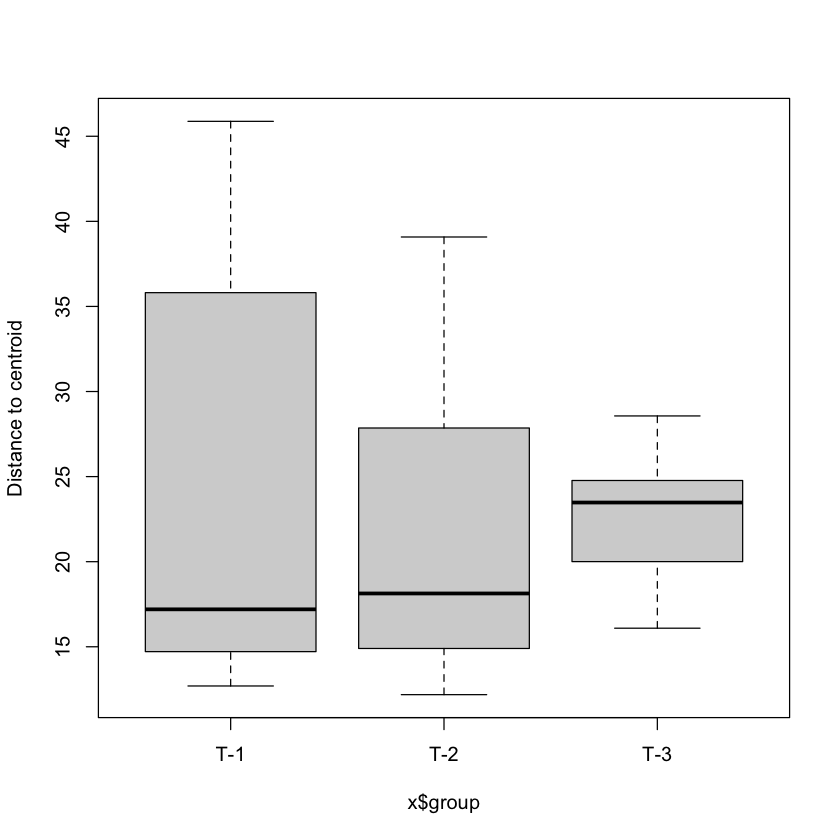

In [61]:
#distances between controls from three time points at Ambient(control)
ps_clr.dist_CON <- vegdist(otu_table(ps_clr_CON), method ="euclidean")
## Calculate multivariate dispersions
mod_geno <- betadisper(ps_clr.dist_CON, sample_data(ps_clr_CON)$TimePoint)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999, strata=Genotype)
boxplot(mod_geno)


#test control-1 samples for genotype differences

ps_clr_df_CON=as.data.frame(otu_table(ps_clr_CON))
ps_clr_meta_CON= as(sample_data(ps_clr_CON), "data.frame")

adonis(ps_clr_df_CON~TimePoint, 
       data= ps_clr_meta_CON, permutations = 999,
         method = "euclidean",  strata=ps_clr_meta_CON$Genotype) 


pairwise.adonis(ps_clr_df_CON, ps_clr_meta_CON$TimePoint, sim.method = "euclidean",
                p.adjust.m = "bonferroni")

#Dispersion is not sig
#Grouping are sig and so are all pairwise

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
            diff       lwr      upr     p adj
T-2-T-1 1.753148 -10.79031 14.29660 0.9348871
T-3-T-1 5.268855 -10.21512 20.75283 0.6750674
T-3-T-2 3.515707 -12.20835 19.23976 0.8424402



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     2   95.5  47.749 0.3634    999  0.713
Residuals 23 3022.4 131.408                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
        T-1     T-2   T-3
T-1         0.74300 0.484
T-2 0.74417         0.388
T-3 0.48223 0.39476      


Call:
adonis(formula = ps_clr_df_N ~ TimePoint, data = ps_clr_meta_N,      permutations = 999, method = "euclidean", strata = ps_clr_meta_N$Genotype) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
TimePoint  2    4122.4 2061.19   3.471 0.23185  0.001 ***
Residuals 23   13658.0  593.83         0.76815           
Total     25   17780.4                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
T-2 vs T-1,1,1742.219,3.141967,0.1419010,0.001,0.003,*
T-2 vs T-3,1,1930.974,3.221349,0.1985870,0.001,0.003,*
T-1 vs T-3,1,2601.930,4.052887,0.2245007,0.001,0.003,*


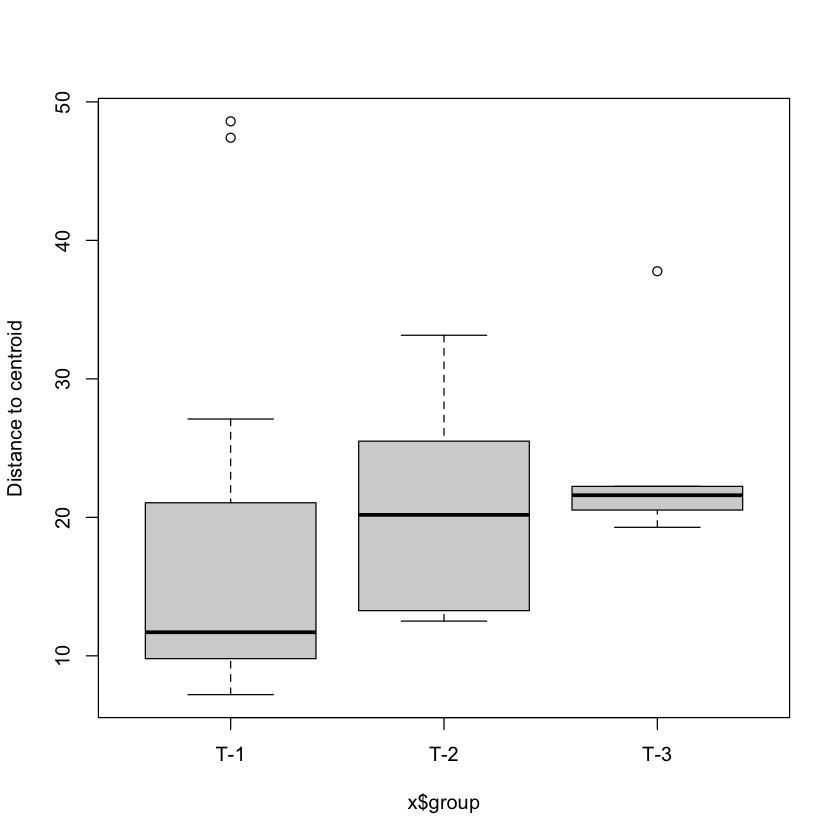

In [63]:
#distances between controls from three time points o
ps_clr.dist_N <- vegdist(otu_table(ps_clr_N), method ="euclidean")
## Calculate multivariate dispersions
mod_N <- betadisper(ps_clr.dist_N, sample_data(ps_clr_N)$TimePoint)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_N)
permutest(mod_N, pairwise = TRUE, permutations = 999)
boxplot(mod_N)


#test control-1 samples for genotype differences

ps_clr_df_N=as.data.frame(otu_table(ps_clr_N))
ps_clr_meta_N= as(sample_data(ps_clr_N), "data.frame")

adonis(ps_clr_df_N~TimePoint, 
       data= ps_clr_meta_N, permutations = 999,
         method = "euclidean",  strata=ps_clr_meta_N$Genotype) 


pairwise.adonis(ps_clr_df_N, ps_clr_meta_N$TimePoint, sim.method = "euclidean",
                p.adjust.m = "bonferroni")

#Dispersion is not sig
#Grouping are sig and so are all pairwise

In [64]:
ps_clr_NP

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 666 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 666 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 666 tips and 665 internal nodes ]

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
             diff       lwr       upr     p adj
T-2-T-1 -2.391853 -9.093333  4.309628 0.6619662
T-3-T-1  9.212946  2.040626 16.385267 0.0091237
T-3-T-2 11.604799  4.226712 18.982886 0.0013028



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups     2  901.45  450.73 7.9948    999  0.001 ***
Residuals 38 2142.35   56.38                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           T-1        T-2   T-3
T-1            4.5800e-01 0.004
T-2 4.3388e-01            0.001
T-3 1.1739e-02 3.3470e-06      


Call:
adonis(formula = ps_clr_df_NP ~ TimePoint, data = ps_clr_meta_NP,      permutations = 999, method = "euclidean", strata = ps_clr_meta_NP$Genotype) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
TimePoint  2    5298.1 2649.06  4.8216 0.20241  0.001 ***
Residuals 38   20877.7  549.41         0.79759           
Total     40   26175.8                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
T-2 vs T-1,1,2083.594,4.993898,0.1513582,0.001,0.003,*
T-2 vs T-3,1,2356.258,4.019402,0.1487598,0.001,0.003,*
T-1 vs T-3,1,3548.472,5.347339,0.1762045,0.001,0.003,*


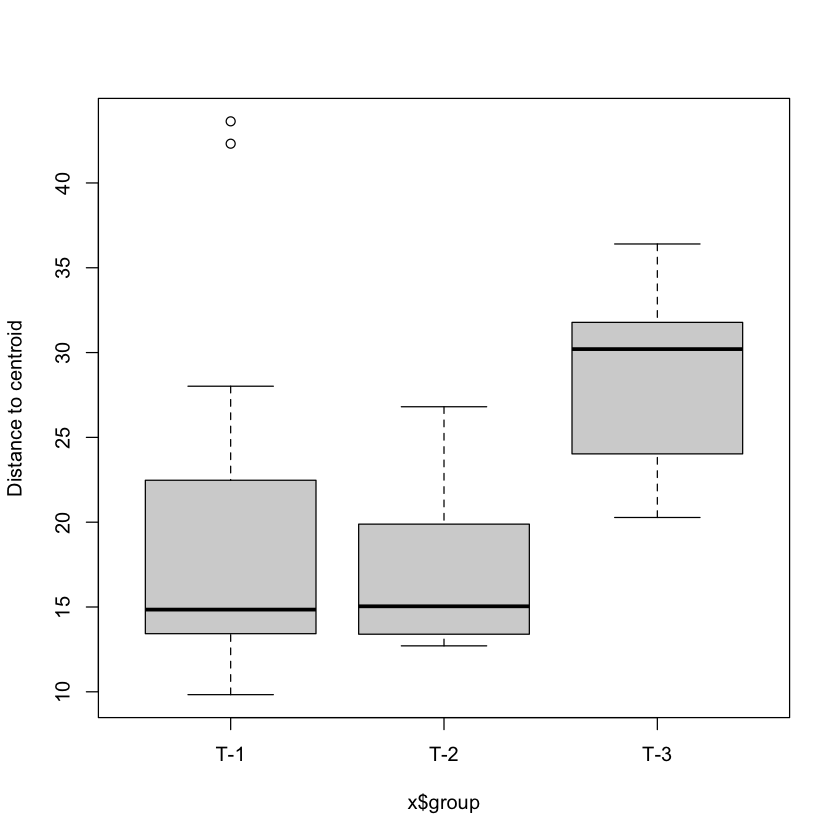

In [65]:
#distances between controls from three time points o
ps_clr.dist_NP <- vegdist(otu_table(ps_clr_NP), method ="euclidean")
## Calculate multivariate dispersions
mod_NP <- betadisper(ps_clr.dist_NP, sample_data(ps_clr_NP)$TimePoint)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_NP, conf.level = 0.95)
permutest(mod_NP, pairwise = TRUE, permutations = 999, , strata=Genotype)
boxplot(mod_NP)


#test control-1 samples for genotype differences

ps_clr_df_NP=as.data.frame(otu_table(ps_clr_NP))
ps_clr_meta_NP= as(sample_data(ps_clr_NP), "data.frame")

adonis(ps_clr_df_NP~TimePoint, 
       data= ps_clr_meta_NP, permutations = 999,
         method = "euclidean", strata=ps_clr_meta_NP$Genotype) 


pairwise.adonis(ps_clr_df_NP, ps_clr_meta_NP$TimePoint, sim.method = "euclidean",
                p.adjust.m = "bonferroni")

#Dispersion is sig and pairwise is for t-1 and t2
#Grouping are sig and so are all pairwise

In [27]:
library("data.table")
fast_melt = function(physeq){
  # supports "naked" otu_table as `physeq` input.
  otutab = as(otu_table(physeq), "matrix")
  if(!taxa_are_rows(physeq)){otutab <- t(otutab)}
  otudt = data.table(otutab, keep.rownames = TRUE)
  setnames(otudt, "rn", "taxaID")
  # Enforce character taxaID key
  otudt[, taxaIDchar := as.character(taxaID)]
  otudt[, taxaID := NULL]
  setnames(otudt, "taxaIDchar", "taxaID")
  # Melt count table
  mdt = melt.data.table(otudt, 
                        id.vars = "taxaID",
                        variable.name = "SampleID",
                        value.name = "count")
  # Remove zeroes, NAs
  mdt <- mdt[count > 0][!is.na(count)]
  # Calculate relative abundance
  mdt[, RelativeAbundance := count / sum(count), by = SampleID]
  if(!is.null(tax_table(physeq, errorIfNULL = FALSE))){
    # If there is a tax_table, join with it. Otherwise, skip this join.
    taxdt = data.table(as(tax_table(physeq, errorIfNULL = TRUE), "matrix"), keep.rownames = TRUE)
    setnames(taxdt, "rn", "taxaID")
    # Enforce character taxaID key
    taxdt[, taxaIDchar := as.character(taxaID)]
    taxdt[, taxaID := NULL]
    setnames(taxdt, "taxaIDchar", "taxaID")
    # Join with tax table
    setkey(taxdt, "taxaID")
    setkey(mdt, "taxaID")
    mdt <- taxdt[mdt]
  }
  return(mdt)
}

summarize_taxa = function(physeq, Rank, GroupBy = NULL){
  Rank <- Rank[1]
  if(!Rank %in% rank_names(physeq)){
    message("The argument to `Rank` was:\n", Rank,
            "\nBut it was not found among taxonomic ranks:\n",
            paste0(rank_names(physeq), collapse = ", "), "\n",
            "Please check the list shown above and try again.")
  }
  if(!is.null(GroupBy)){
    GroupBy <- GroupBy[1]
    if(!GroupBy %in% sample_variables(physeq)){
      message("The argument to `GroupBy` was:\n", GroupBy,
              "\nBut it was not found among sample variables:\n",
              paste0(sample_variables(physeq), collapse = ", "), "\n",
              "Please check the list shown above and try again.")
    }
  }
  # Start with fast melt
  mdt = fast_melt(physeq)
  if(!is.null(GroupBy)){
    # Add the variable indicated in `GroupBy`, if provided.
    sdt = data.table(SampleID = sample_names(physeq),
                     var1 = get_variable(physeq, GroupBy))
    setnames(sdt, "var1", GroupBy)
    # Join
    setkey(sdt, SampleID)
    setkey(mdt, SampleID)
    mdt <- sdt[mdt]
  }
  # Summarize
Nsamples = nsamples(physeq)
  summarydt = mdt[, list(meanRA = (mean(RelativeAbundance))*100,
                         sdRA = sd(RelativeAbundance)*100,
                         minRA = min(RelativeAbundance)*100,
                         maxRA = max(RelativeAbundance)*100),
                  by = c(Rank, GroupBy)]
  return(summarydt)
}




Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [28]:
subset_samples(ps, treatment=="A" | TimePoint=="T-1" ) %>%
summarize_taxa(Rank="Family", GroupBy="Genotype") %>%
filter(Genotype=="G_7") %>%
arrange(-meanRA) %>%
head()

Family,Genotype,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Midichloriaceae,G_7,10.633937,26.984090,0.03078818,97.588583
Endozoicomonadaceae,G_7,8.187019,11.728108,0.02331274,43.115990
Paenibacillaceae,G_7,4.557799,11.303058,0.12896570,62.640354
Alteromonadaceae,G_7,3.446926,8.094200,0.05828185,44.827169
Francisellaceae,G_7,1.868204,1.842791,0.07909828,3.760357
Nostocaceae,G_7,1.857460,2.242485,0.11951511,9.103182


In [31]:
subset_samples(ps, TimePoint=="T-1") %>%
summarize_taxa(Rank="Family", GroupBy="Treatments") %>%
arrange(-meanRA) %>%
head()

Family,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Midichloriaceae,AC_D75,60.084307,42.901967,0.02733485,98.43544
Midichloriaceae,NPC_D75,58.891386,43.750137,0.02707093,98.68762
Midichloriaceae,NC_D75,42.689982,47.217763,0.01848429,99.50647
Paenibacillaceae,NC_D75,8.042689,18.488510,0.04846918,67.57568
Paenibacillaceae,NPC_D75,4.245141,11.552734,0.04179554,62.64035
Paenibacillaceae,AC_D75,4.125993,5.988056,0.05216484,22.80853


In [36]:
subset_samples(ps, TimePoint=="T-2") %>%
summarize_taxa(Rank="Family", GroupBy="Treatments") %>%
arrange(-meanRA) %>%
head()

Family,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Midichloriaceae,NPH_D100,76.852630,23.528238,0.02931692,93.73880
Midichloriaceae,NH_D100,65.179482,34.134068,0.02196354,98.99522
Midichloriaceae,AH_D100,51.409192,41.619750,0.02042692,97.00473
Endozoicomonadaceae,AH_D100,7.205888,12.075585,0.07490637,43.11599
Moraxellaceae,NH_D100,3.529694,5.071402,0.02614672,12.04726
Alteromonadaceae,AH_D100,2.559630,4.593434,0.10674800,19.39898


In [37]:
subset_samples(ps, TimePoint=="T-3") %>%
summarize_taxa(Rank="Family", GroupBy="Treatments") %>%
arrange(-meanRA)  %>%
head()

Family,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Midichloriaceae,NPH_D111,38.258769,34.36705,1.261887345,88.82907
Midichloriaceae,AH_D111,31.204311,29.30171,0.008180294,77.02282
Midichloriaceae,NH_101,27.811987,18.61199,2.029850746,47.00185
Colwelliaceae,NH_101,14.360006,14.96791,1.221001221,34.56091
Pseudoalteromonadaceae,NH_101,6.495886,16.63604,0.307503075,47.66169
Alteromonadaceae,AH_D111,5.501072,10.48122,0.042613636,44.82717


In [32]:
#Rivularia
subset_samples(ps, TimePoint=="T-1") %>%
summarize_taxa(Rank="ASV", GroupBy="Treatments") %>%
filter(ASV=="ASV989") %>%
arrange(-meanRA)


subset_samples(ps, TimePoint=="T-1") %>%
summarize_taxa(Rank="ASV", GroupBy="Genotype") %>%
filter(ASV=="ASV989") %>%
arrange(-meanRA)

ASV,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV989,AC_D75,1.8845483,3.030171,0.05924873,9.1031823
ASV989,NPC_D75,1.1775854,1.756462,0.06571166,5.8346554
ASV989,NC_D75,0.1500085,0.054043,0.11179430,0.1882226


ASV,Genotype,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV989,G_7,3.5638429,3.17034427,0.59136606,9.1031823
ASV989,G_31,2.0344285,3.29153451,0.08040740,5.8346554
ASV989,G_8,0.7113630,0.76867145,0.10530275,1.7611026
ASV989,G_50,0.4638518,0.67626852,0.05924873,1.9760192
ASV989,G_62,0.2034334,0.12034893,0.06571166,0.2883691
ASV989,G_48,0.1359117,0.06459467,0.09023642,0.1815871


In [33]:
#methyl
subset_samples(ps, TimePoint=="T-1") %>%
summarize_taxa(Rank="ASV", GroupBy="Treatments") %>%
filter(ASV=="ASV347") %>%
arrange(-meanRA)


subset_samples(ps, TimePoint=="T-1") %>%
summarize_taxa(Rank="ASV", GroupBy="Genotype") %>%
filter(ASV=="ASV347") %>%
arrange(-meanRA)

ASV,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV347,AC_D75,1.2328812,1.4654537,0.01934610,5.242464
ASV347,NPC_D75,0.9177585,0.9168164,0.04511821,2.568901
ASV347,NC_D75,0.8765982,0.6772311,0.01739433,1.796157


ASV,Genotype,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV347,G_8,2.0053369,1.9260888,0.35621762,5.2424640
ASV347,G_7,1.5358241,1.5918769,0.18120045,4.9272487
ASV347,G_50,0.9545349,0.6630256,0.15935747,1.9472422
ASV347,G_62,0.7358414,0.6333206,0.01739433,1.7961571
ASV347,G_48,0.5152398,0.4660561,0.01934610,1.0767160
ASV347,G_31,0.4532596,0.4542585,0.03419388,0.9610521


In [34]:
#pseudomon
subset_samples(ps, TimePoint=="T-1") %>%
summarize_taxa(Rank="ASV", GroupBy="Treatments") %>%
filter(ASV=="ASV2609") %>%
arrange(-meanRA)


subset_samples(ps, TimePoint=="T-1") %>%
summarize_taxa(Rank="ASV", GroupBy="Genotype") %>%
filter(ASV=="ASV2609") %>%
arrange(-meanRA)

ASV,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV2609,NPC_D75,1.1123723,NA,1.1123723,1.112372
ASV2609,AC_D75,1.0592068,0.9486553,0.2650260,3.160806
ASV2609,NC_D75,0.7179375,0.6387340,0.2662843,1.169591


ASV,Genotype,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV2609,G_62,1.5318076,1.48148110,0.2650260,3.1608060
ASV2609,G_7,1.2128163,0.51622460,0.6115515,1.9953952
ASV2609,G_31,0.3405018,NA,0.3405018,0.3405018
ASV2609,G_48,0.3165829,0.07113296,0.2662843,0.3668815
ASV2609,G_8,0.2943275,NA,0.2943275,0.2943275


In [39]:
subset_samples(ps, Treatment=="C") %>%
summarize_taxa(Rank="Family", "Treatments") %>%
arrange(-meanRA) %>%
head()

Family,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Midichloriaceae,AC_D75,60.084307,42.901967,0.027334852,98.43544
Midichloriaceae,AH_D100,51.409192,41.619750,0.020426923,97.00473
Midichloriaceae,AH_D111,31.204311,29.301712,0.008180294,77.02282
Endozoicomonadaceae,AH_D100,7.205888,12.075585,0.074906367,43.11599
Alteromonadaceae,AH_D111,5.501072,10.481222,0.042613636,44.82717
Paenibacillaceae,AC_D75,4.125993,5.988056,0.052164841,22.80853


In [40]:
subset_samples(ps, Treatment=="N") %>%
summarize_taxa(Rank="Family", "Treatments") %>%
arrange(-meanRA) %>%
head()

Family,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Midichloriaceae,NH_D100,65.179482,34.13407,0.02196354,98.99522
Midichloriaceae,NC_D75,42.689982,47.21776,0.01848429,99.50647
Midichloriaceae,NH_101,27.811987,18.61199,2.02985075,47.00185
Colwelliaceae,NH_101,14.360006,14.96791,1.22100122,34.56091
Paenibacillaceae,NC_D75,8.042689,18.48851,0.04846918,67.57568
Pseudoalteromonadaceae,NH_101,6.495886,16.63604,0.30750308,47.66169


In [41]:
subset_samples(ps, Treatment=="NP") %>%
summarize_taxa(Rank="Family", "Treatments") %>%
arrange(-meanRA) %>%
head()

Family,Treatments,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Midichloriaceae,NPH_D100,76.852630,23.528238,0.02931692,93.73880
Midichloriaceae,NPC_D75,58.891386,43.750137,0.02707093,98.68762
Midichloriaceae,NPH_D111,38.258769,34.367050,1.26188734,88.82907
Paenibacillaceae,NPC_D75,4.245141,11.552734,0.04179554,62.64035
Arcobacteraceae,NPH_D111,3.925177,5.599920,0.10596427,12.60059
Alteromonadaceae,NPH_D111,3.252439,5.926766,0.20781380,19.31577
